# SSLII - Proyecto Final Secuential Neural Networks

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np 
import keras
from keras.models import load_model

In [4]:
tokenizer = Tokenizer()
data = open('2. eresarte_20_poemas_de_amor.txt').read()
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'de': 1, 'que': 2, 'la': 3, 'el': 4, 'en': 5, 'y': 6, 'a': 7, 'un': 8, 'mi': 9, 'los': 10, 'me': 11, 'por': 12, 'se': 13, 'con': 14, 'no': 15, 'las': 16, 'como': 17, 'es': 18, 'lo': 19, 'para': 20, 'del': 21, 'te': 22, 'tu': 23, 'al': 24, 'una': 25, 'vida': 26, 'más': 27, 'si': 28, 'ser': 29, 'mis': 30, 'nos': 31, 'todo': 32, 'alma': 33, 'su': 34, 'sin': 35, 'este': 36, 'tiempo': 37, 'ojos': 38, 'amor': 39, 'cuando': 40, 'donde': 41, 'ganas': 42, 'ti': 43, 'arte': 44, 'día': 45, 'yo': 46, 'mas': 47, 'qué': 48, 'tus': 49, 'besos': 50, 'pero': 51, 'noche': 52, 'hace': 53, 'le': 54, 'usted': 55, 'menos': 56, 'cielo': 57, 'recuerdo': 58, 'ni': 59, 'solo': 60, 'luz': 61, 'eres': 62, 'tierra': 63, 'tú': 64, 'ese': 65, 'sueño': 66, 'entre': 67, 'tan': 68, 'deseo': 69, 'café': 70, 'aquel': 71, 'desde': 72, 'hasta': 73, 'o': 74, 'esta': 75, 'corazón': 76, 'son': 77, 'veces': 78, 'mirada': 79, 'mundo': 80, 'ella': 81, 'viento': 82, 'momento': 83, 'sueños': 84, 'ver': 85, 'mejor': 86, 'voz': 87,

In [5]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
print(tokenizer.word_index['amor'])

39


In [7]:
print(tokenizer.word_index)

{'de': 1, 'que': 2, 'la': 3, 'el': 4, 'en': 5, 'y': 6, 'a': 7, 'un': 8, 'mi': 9, 'los': 10, 'me': 11, 'por': 12, 'se': 13, 'con': 14, 'no': 15, 'las': 16, 'como': 17, 'es': 18, 'lo': 19, 'para': 20, 'del': 21, 'te': 22, 'tu': 23, 'al': 24, 'una': 25, 'vida': 26, 'más': 27, 'si': 28, 'ser': 29, 'mis': 30, 'nos': 31, 'todo': 32, 'alma': 33, 'su': 34, 'sin': 35, 'este': 36, 'tiempo': 37, 'ojos': 38, 'amor': 39, 'cuando': 40, 'donde': 41, 'ganas': 42, 'ti': 43, 'arte': 44, 'día': 45, 'yo': 46, 'mas': 47, 'qué': 48, 'tus': 49, 'besos': 50, 'pero': 51, 'noche': 52, 'hace': 53, 'le': 54, 'usted': 55, 'menos': 56, 'cielo': 57, 'recuerdo': 58, 'ni': 59, 'solo': 60, 'luz': 61, 'eres': 62, 'tierra': 63, 'tú': 64, 'ese': 65, 'sueño': 66, 'entre': 67, 'tan': 68, 'deseo': 69, 'café': 70, 'aquel': 71, 'desde': 72, 'hasta': 73, 'o': 74, 'esta': 75, 'corazón': 76, 'son': 77, 'veces': 78, 'mirada': 79, 'mundo': 80, 'ella': 81, 'viento': 82, 'momento': 83, 'sueños': 84, 'ver': 85, 'mejor': 86, 'voz': 87,

## Modelo 01 - Modelo utilzando LSTM sencillo

In [8]:
model2 = Sequential()
model2.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model2.add(LSTM(150))
model2.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 157, 100)          289500    
_________________________________________________________________
lstm (LSTM)                  (None, 150)               150600    
_________________________________________________________________
dense (Dense)                (None, 2895)              437145    
Total params: 877,245
Trainable params: 877,245
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
callback_a = ModelCheckpoint(filepath='best_model_lstm_single.h5', monitor='accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')
history = model2.fit(xs, ys, epochs=100, verbose=1, callbacks=[callback_a, earlystop])
print(model2)

Epoch 1/100
416/416 [==============================] - 22s 34ms/step - loss: 6.6573 - accuracy: 0.0570
Epoch 2/100
416/416 [==============================] - 14s 34ms/step - loss: 5.5874 - accuracy: 0.1099
Epoch 3/100
416/416 [==============================] - 14s 34ms/step - loss: 4.5009 - accuracy: 0.1925
Epoch 4/100
416/416 [==============================] - 14s 34ms/step - loss: 3.4560 - accuracy: 0.2986
Epoch 5/100
416/416 [==============================] - 14s 34ms/step - loss: 2.6211 - accuracy: 0.4195
Epoch 6/100
416/416 [==============================] - 14s 34ms/step - loss: 2.0130 - accuracy: 0.5265
Epoch 7/100
416/416 [==============================] - 14s 34ms/step - loss: 1.5959 - accuracy: 0.6165
Epoch 8/100
416/416 [==============================] - 14s 34ms/step - loss: 1.2937 - accuracy: 0.6868
Epoch 9/100
416/416 [==============================] - 14s 34ms/step - loss: 1.1117 - accuracy: 0.7275
Epoch 10/100
416/416 [==============================] - 14s 34ms/step - l

## Modelo 02 - Modelo Secuencial utilizando LSTM bidireccional

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 157, 100)          289500    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_2 (Dense)              (None, 2895)              871395    
Total params: 1,462,095
Trainable params: 1,462,095
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
callback_a = ModelCheckpoint(filepath='best_model_bidireccionalLSTM.h5', monitor='accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='accuracy', min_delta=0, patience=5, verbose=0, mode='auto')
history2 = model.fit(xs, ys, epochs=100, verbose=1, callbacks=[callback_a])
print(model)

Epoch 1/100
416/416 [==============================] - 28s 67ms/step - loss: 0.8716 - accuracy: 0.7722
Epoch 2/100
416/416 [==============================] - 28s 67ms/step - loss: 0.8412 - accuracy: 0.7784
Epoch 3/100
416/416 [==============================] - 28s 67ms/step - loss: 0.8105 - accuracy: 0.7843
Epoch 4/100
416/416 [==============================] - 28s 67ms/step - loss: 0.7937 - accuracy: 0.7894
Epoch 5/100
416/416 [==============================] - 28s 67ms/step - loss: 0.7944 - accuracy: 0.7914
Epoch 6/100
416/416 [==============================] - 28s 67ms/step - loss: 0.9798 - accuracy: 0.7474
Epoch 7/100
416/416 [==============================] - 28s 67ms/step - loss: 1.0536 - accuracy: 0.7208
Epoch 8/100
416/416 [==============================] - 28s 67ms/step - loss: 1.0144 - accuracy: 0.7293
Epoch 9/100
416/416 [==============================] - 28s 67ms/step - loss: 0.8257 - accuracy: 0.7806
Epoch 10/100
416/416 [==============================] - 28s 67ms/step - l

In [13]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

### Modelo 0
Datos De Entrada: Eres Arte 
LSTM: Sencillo

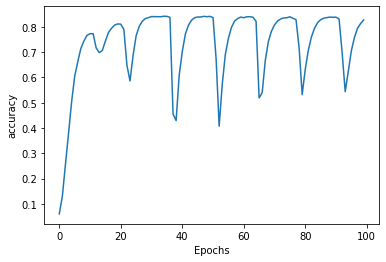

In [ ]:
plot_graphs(history, 'accuracy')


### Modelo 1
Datos De Entrada: Eres Arte + 20 Poemas de amor y una canción desesperada
LSTM: Sencillo
Archivo: 2. eresarte_20_poemas_de_amor.txt

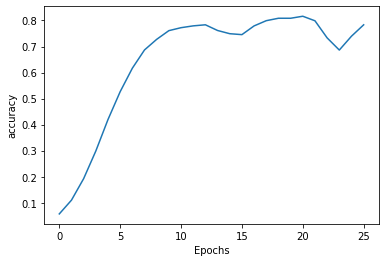

In [14]:
plot_graphs(history, 'accuracy')

### Modelo 2
Datos De Entrada: Eres Arte + 20 Poemas de amor y una canción desesperada<br>
LSTM: Bidireccional<br>
Archivo: 2. eresarte_20_poemas_de_amor.txt<br>

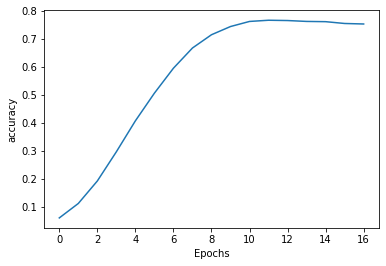

In [17]:
plot_graphs(history2, 'accuracy')

In [15]:
def generar_poema(text, num_words):
  seed_text = text
  next_words = num_words
  #predicted = model.predict_classes(token_list, verbose=0) 

  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model2.predict(token_list)
    classes_x = np.argmax(predicted,axis=1)

    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == classes_x:
        output_word = word
        break
    seed_text += " " + word
    
  print(seed_text)

###Quiero tu cuerpo

Quiero tu cuerpo, <br>
He soñado que muero en ese momento, <br>
Donde el arte funde en uno, <br>
Nuestros corazones.<br>
<br>
Busco en tí, <br>
Que culminen las guerras, <br>
Y platiquen las almas. <br>
<br>
Entregate a mi, <br>
Rayo de sol, <br>
Como un túnel, <br>
Del que huyen pájaros del cielo. <br>
<br>
Dame luz de humo, <br>
de estanque en calma, <br>
de rosas de papel. <br>
<br>
Quiero tu cuerpo alegre, <br>
Tus luminosos ojos,<br>
Y jamás volver sólo a ese café<br>
<br>
AI/ALVOZA



In [ ]:
##Generado con el modelo 0
generar_poema("Quiero tu cuerpo", 10)

Quiero tu cuerpo he soñado mueren este momento del arte para un corazón


Quiero tu cuerpo, <br>
He soñado que muero en ese momento, <br>
Donde el arte funde en uno, <br>
Nuestros corazones.<br>

In [ ]:
##Generado con el modelo 2
generar_poema("Busco en ti", 10)

Busco en ti se acumularon las guerras y que platiquen dos almas la


Busco en tí, <br>
Que culminen las guerras, <br>
Y platiquen las almas. <br>

In [ ]:
##Generado con el modelo 2
generar_poema("Dame luz", 10)

Dame luz de humo de estanque en calma las rosas practicándose en


Dame luz de humo, <br>
de estanque en calma, <br>
de rosas de papel. <br>

In [ ]:
##Generado con el modelo 2
generar_poema("Rayo de sol", 10)

Rayo de sol como un túnel de mí huían los pájaros del pecho


Rayo de sol, <br>
Como un túnel, <br>
Del que huyen pájaros del cielo. <br>

In [ ]:
##Generado con el modelo 2
generar_poema("Quiero tu cuerpo", 10)

Quiero tu cuerpo alegre tus luminosos ojos y volver a ese café solo


Quiero tu cuerpo alegre, <br>
Tus luminosos ojos,<br>
Y jamás volver sólo a ese café<br>

In [16]:
##Generado con el modelo 1
generar_poema("Quiero tu cuerpo", 10)

Quiero tu cuerpo de estatua temerosa pequeña tu alma se habla de peces
